In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [33]:
data = pd.read_csv("train.csv")

In [34]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [35]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [36]:
data2 = data.drop(columns = ["PassengerId", "Name", "Ticket", "Cabin"])

In [37]:
data2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [38]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [39]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [40]:
data2.Age.fillna(data2.Age.mean(), inplace = True)

In [41]:
data2.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [42]:
data2.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [43]:
data2.Embarked.fillna('S', inplace = True)

In [44]:
data2.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [45]:
data2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


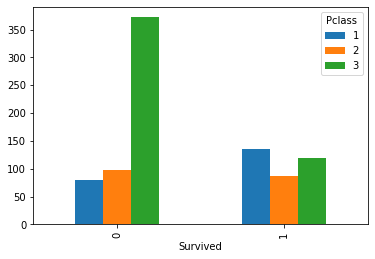

In [46]:
pd.crosstab(data2.Survived, data2.Pclass).plot(kind = 'bar')

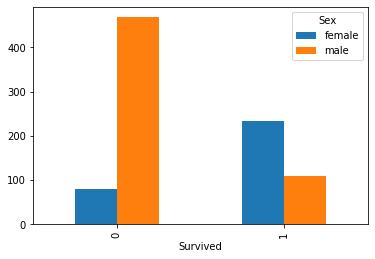

In [47]:
pd.crosstab(data2.Survived, data2.Sex).plot(kind = 'bar')

In [50]:
data2.groupby('Survived').mean()

,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,
0,2.531876,30.415100,0.553734,0.329690,22.117887
1,1.950292,28.549778,0.473684,0.464912,48.395408


In [52]:
data2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [54]:
Sex_dummies = pd.get_dummies(data2.Sex)

In [55]:
Sex_dummies.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [70]:
data3 = pd.concat([data2,Sex_dummies], axis = 'columns')

In [71]:
data3.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,female,male
0,0,3,male,22.0,1,0,7.2500,S,0,1
1,1,1,female,38.0,1,0,71.2833,C,1,0
2,1,3,female,26.0,0,0,7.9250,S,1,0
3,1,1,female,35.0,1,0,53.1000,S,1,0
4,0,3,male,35.0,0,0,8.0500,S,0,1


In [72]:
data4 = data3.drop(columns = ['Sex'])

In [73]:
Embark_dummies = pd.get_dummies(data4.Embarked, prefix = "Embark")

In [74]:
Embark_dummies.head()

,Embark_C,Embark_Q,Embark_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [75]:
data4 = pd.concat([data4, Embark_dummies], axis = 'columns')

In [76]:
data4.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,female,male,Embark_C,Embark_Q,Embark_S
0,0,3,22.0,1,0,7.2500,S,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,C,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,S,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,S,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,S,0,1,0,0,1


In [77]:
data4.drop(columns = ["Embarked"], inplace = True)

In [78]:
data4.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,Embark_C,Embark_Q,Embark_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [98]:
x = data4.drop(columns = ['Survived'], axis = 1)
y = data4.Survived

### As of now not requird

In [99]:
# from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [100]:
from sklearn.linear_model import LogisticRegression

In [101]:
model = LogisticRegression()

In [102]:
model.fit(x, y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [85]:
model.predict(x_test)

array([1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1], dtype=int64)

In [103]:
model.score(x, y)

0.8035914702581369

In [94]:
model.predict([[2, 21, 0, 0, 30, 0, 1, 0, 0, 1]])

array([0], dtype=int64)

In [105]:
model.predict([[2, 22, 0, 0, 40, 0, 1, 1, 0, 0]])

array([0], dtype=int64)

In [104]:
x.head()

,Pclass,Age,SibSp,Parch,Fare,female,male,Embark_C,Embark_Q,Embark_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


### Testing 

In [108]:
test_data1 = pd.read_csv("test.csv")

In [109]:
test_data1.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [110]:
test_data1.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [111]:
test_data2 = test_data1.drop(columns = ["PassengerId", "Name", "Ticket", "Cabin"])

In [112]:
test_data2.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [113]:
test_data2.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [114]:
test_data2.fillna(test_data2.Age.mean(), inplace = True)

In [115]:
test_data2.fillna(28, inplace = True)

In [116]:
test_data2.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [120]:
test_data2.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [121]:
test_Embark_dummies = pd.get_dummies(test_data2.Embarked, prefix = "Embark")

In [122]:
test_sex_dummies = pd.get_dummies(test_data2.Sex)

In [123]:
test_final = pd.concat([test_Embark_dummies, test_sex_dummies, test_data2], axis = 'columns')

In [124]:
test_final.head()

,Embark_C,Embark_Q,Embark_S,female,male,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,1,0,0,1,3,male,34.5,0,0,7.8292,Q
1,0,0,1,1,0,3,female,47.0,1,0,7.0000,S
2,0,1,0,0,1,2,male,62.0,0,0,9.6875,Q
3,0,0,1,0,1,3,male,27.0,0,0,8.6625,S
4,0,0,1,1,0,3,female,22.0,1,1,12.2875,S


In [126]:
test_final.drop(columns = ["Sex", "Embarked"], inplace = True)

In [127]:
test_final.head()

,Embark_C,Embark_Q,Embark_S,female,male,Pclass,Age,SibSp,Parch,Fare
0,0,1,0,0,1,3,34.5,0,0,7.8292
1,0,0,1,1,0,3,47.0,1,0,7.0000
2,0,1,0,0,1,2,62.0,0,0,9.6875
3,0,0,1,0,1,3,27.0,0,0,8.6625
4,0,0,1,1,0,3,22.0,1,1,12.2875


In [128]:
model.predict(test_final)

array([0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,

In [ ]:
model.score()

### Submission

In [130]:
p_id = test_data1.PassengerId

In [131]:
pred = model.predict(test_final)

In [137]:
submission = pd.DataFrame({"PassengerId" : p_id, "Survived" : pred})

In [138]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [139]:
submission.to_csv("submission.csv", index = False)